<a href="https://colab.research.google.com/github/gustavoramos82/maratona-tech-rs/blob/main/Notebooks/An%C3%A1lise_inicial_barragem_aneel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fazendo análise incial

Neste notebook, estaremos fazendo a análise inicnal dos dataset e ver quais insigths podem tirados e se há algum tipo de alteração a ser feita sobre as barragens envolvendo hidrelelétrica no rio grande so sul (Em que foi feito o filtro pela proposta do hachathon)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
barragem_rs = pd.read_csv('/content/Fisc barra rs.csv',encoding='latin1')
barragem_rs.drop('Unnamed: 0',axis=1,inplace=True)
barragem_rs.head()

,IdeNucleoCEG,NomUsina,NomEmpresa,NomBarramento,DscTipo,DscNivelSegurancaBarragem,IdcClassificacaoBarragens,DscCategoriaRiscoGeral,DscDanoPotencialGeral,DscVersao,...,DscISRRealizada,DatConclusaoISR,DscISERealizada,QtdMunicipioAfetado,MdaVazaoVertedouro,MdaCotaCoroamentoBarramento,NomTipoEstrutural,DscTipoEstrutural,DscEstudoRompimento,DscEnquadraResolucao
0,12.0,14 de Julho,Companhia energÃ©tica rio das antas,14 de Julho,Barragem,Normal,B,Baixo,Alto,VersÃ£o 1,...,NÃ£o,1900-01-01,NÃ£o,0,NaN,NaN,Sem InformaÃ§Ã£o,Sem InformaÃ§Ã£o,NaN,Sim
1,324.0,Bugres,Companhia estadual de geraÃ§Ã£o de energia elÃ...,Divisa,Barragem,Normal,C,Baixo,Baixo,VersÃ£o 1,...,NÃ£o,1900-01-01,NÃ£o,0,NaN,NaN,Sem InformaÃ§Ã£o,Sem InformaÃ§Ã£o,NaN,Sim
2,324.0,Bugres,Companhia estadual de geraÃ§Ã£o de energia elÃ...,Blang,Barragem,Normal,B,Baixo,Alto,VersÃ£o 1,...,NÃ£o,1900-01-01,NÃ£o,0,NaN,NaN,Sem InformaÃ§Ã£o,Sem InformaÃ§Ã£o,NaN,Sim
3,324.0,Bugres,Companhia estadual de geraÃ§Ã£o de energia elÃ...,Salto,Barragem,Normal,B,Baixo,Alto,VersÃ£o 1,...,NÃ£o,1900-01-01,NÃ£o,0,NaN,NaN,Sem InformaÃ§Ã£o,Sem InformaÃ§Ã£o,NaN,Sim
4,329.0,BuricÃ¡,Cooperativa de desenvolvimento social entre ri...,PCH BURICÃ,Barragem,Normal,C,Baixo,Baixo,VersÃ£o 1,...,NÃ£o,1900-01-01,NÃ£o,0,NaN,NaN,Sem InformaÃ§Ã£o,Sem InformaÃ§Ã£o,NaN,NÃ£o


In [3]:
barragem_rs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1224 entries, 0 to 1223
Data columns (total 76 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   IdeNucleoCEG                    1224 non-null   float64
 1   NomUsina                        1224 non-null   object 
 2   NomEmpresa                      1224 non-null   object 
 3   NomBarramento                   1224 non-null   object 
 4   DscTipo                         1224 non-null   object 
 5   DscNivelSegurancaBarragem       1224 non-null   object 
 6   IdcClassificacaoBarragens       1131 non-null   object 
 7   DscCategoriaRiscoGeral          1131 non-null   object 
 8   DscDanoPotencialGeral           1224 non-null   object 
 9   DscVersao                       1224 non-null   object 
 10  NomCampanha                     1224 non-null   object 
 11  DatInicioCampanha               1224 non-null   object 
 12  DatFimCampanha                  12

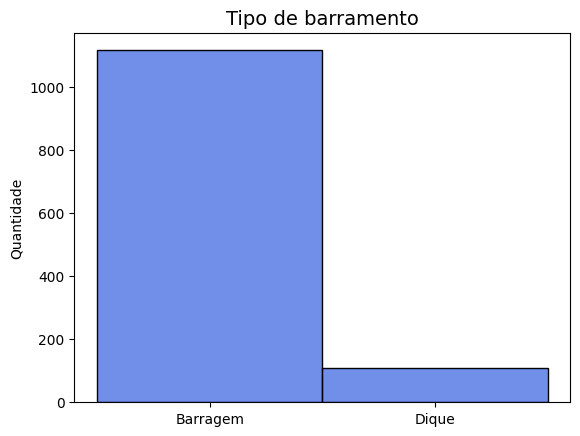

In [4]:
plt.title('Tipo de barramento',fontsize=14)
sns.histplot(x='DscTipo',data=barragem_rs,color='royalblue')
plt.xlabel('')
plt.ylabel('Quantidade');

A diferença entre a barragem e o dique é o seguinte:

- **Dique**: Normalmente é paralelo ao curso de água (rio ou mar).
Possui água apenas em um dos lados, protejendo o outro.

- **Barragem**: Normalmente intercepta o curso de água.
A água está presente dos dois lados (montante e jusante).


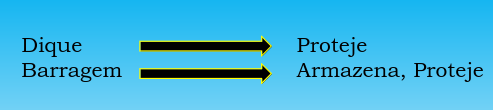

In [5]:
# Fazendo tratamento antes do gráfico
barragem_rs['DscNivelSegurancaBarragem'] = barragem_rs['DscNivelSegurancaBarragem'].str.replace('AtenÃ§Ã£o','Atenção')

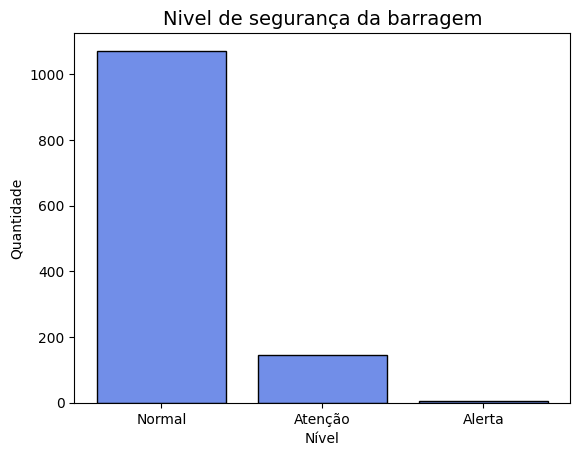

In [6]:
plt.title('Nivel de segurança da barragem',fontsize=14)
sns.histplot(x='DscNivelSegurancaBarragem',data=barragem_rs,color='royalblue',
             shrink=.8)
plt.xlabel('Nível')
plt.ylabel('Quantidade');

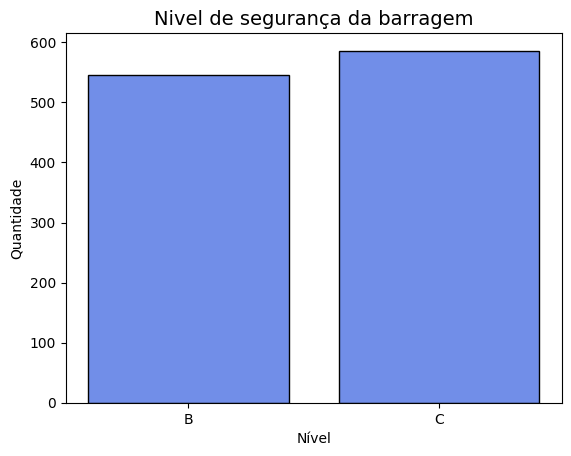

In [7]:
plt.title('Nivel de segurança da barragem',fontsize=14)
sns.histplot(x='IdcClassificacaoBarragens',data=barragem_rs,color='royalblue',
             shrink=.8)
plt.xlabel('Nível')
plt.ylabel('Quantidade');

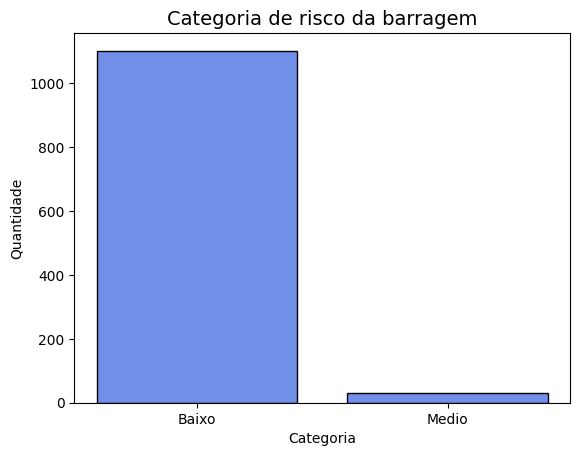

In [8]:
plt.title('Categoria de risco da barragem',fontsize=14)
sns.histplot(x='DscCategoriaRiscoGeral',data=barragem_rs,color='royalblue',
             shrink=.8)
plt.xlabel('Categoria')
plt.ylabel('Quantidade');

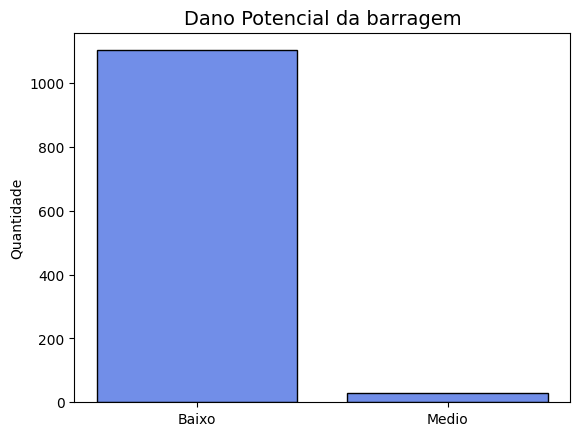

In [9]:
plt.title('Dano Potencial da barragem',fontsize=14)
sns.histplot(x='DscCategoriaRiscoGeral',data=barragem_rs,color='royalblue',
             shrink=.8)
plt.xlabel('')
plt.ylabel('Quantidade');

In [10]:
barragem_rs.drop(['DscFaseUsina'],axis=1,inplace=True) # apagando essa coluna pois só um valor nesse atributo
barragem_rs.head()

,IdeNucleoCEG,NomUsina,NomEmpresa,NomBarramento,DscTipo,DscNivelSegurancaBarragem,IdcClassificacaoBarragens,DscCategoriaRiscoGeral,DscDanoPotencialGeral,DscVersao,...,DscISRRealizada,DatConclusaoISR,DscISERealizada,QtdMunicipioAfetado,MdaVazaoVertedouro,MdaCotaCoroamentoBarramento,NomTipoEstrutural,DscTipoEstrutural,DscEstudoRompimento,DscEnquadraResolucao
0,12.0,14 de Julho,Companhia energÃ©tica rio das antas,14 de Julho,Barragem,Normal,B,Baixo,Alto,VersÃ£o 1,...,NÃ£o,1900-01-01,NÃ£o,0,NaN,NaN,Sem InformaÃ§Ã£o,Sem InformaÃ§Ã£o,NaN,Sim
1,324.0,Bugres,Companhia estadual de geraÃ§Ã£o de energia elÃ...,Divisa,Barragem,Normal,C,Baixo,Baixo,VersÃ£o 1,...,NÃ£o,1900-01-01,NÃ£o,0,NaN,NaN,Sem InformaÃ§Ã£o,Sem InformaÃ§Ã£o,NaN,Sim
2,324.0,Bugres,Companhia estadual de geraÃ§Ã£o de energia elÃ...,Blang,Barragem,Normal,B,Baixo,Alto,VersÃ£o 1,...,NÃ£o,1900-01-01,NÃ£o,0,NaN,NaN,Sem InformaÃ§Ã£o,Sem InformaÃ§Ã£o,NaN,Sim
3,324.0,Bugres,Companhia estadual de geraÃ§Ã£o de energia elÃ...,Salto,Barragem,Normal,B,Baixo,Alto,VersÃ£o 1,...,NÃ£o,1900-01-01,NÃ£o,0,NaN,NaN,Sem InformaÃ§Ã£o,Sem InformaÃ§Ã£o,NaN,Sim
4,329.0,BuricÃ¡,Cooperativa de desenvolvimento social entre ri...,PCH BURICÃ,Barragem,Normal,C,Baixo,Baixo,VersÃ£o 1,...,NÃ£o,1900-01-01,NÃ£o,0,NaN,NaN,Sem InformaÃ§Ã£o,Sem InformaÃ§Ã£o,NaN,NÃ£o


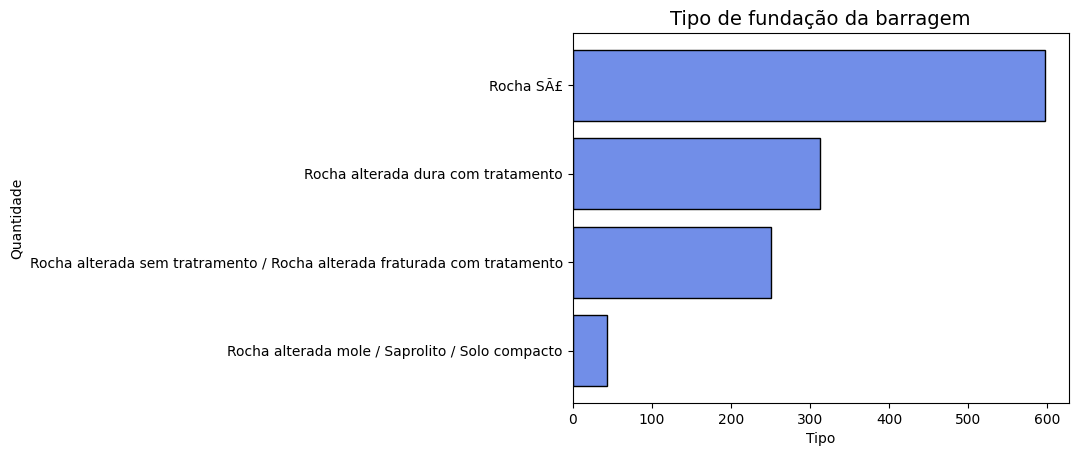

In [11]:
plt.title('Tipo de fundação da barragem',fontsize=14)
sns.histplot(y='DscTipoFundacao',data=barragem_rs,color='royalblue',
             shrink=.8)
plt.xlabel('Tipo')
plt.ylabel('Quantidade');

In [12]:
barragem_rs['DscTipoConstrucaoBarragem'] = barragem_rs['DscTipoConstrucaoBarragem'].str.replace('Concreto CiclÃ³pico',
                                                                                                'Concreto Ciclópico')
barragem_rs['DscTipoConstrucaoBarragem'] = barragem_rs['DscTipoConstrucaoBarragem'].str.replace('Terra HomogÃªnea',
                                                                                                'Terra Homogênea')

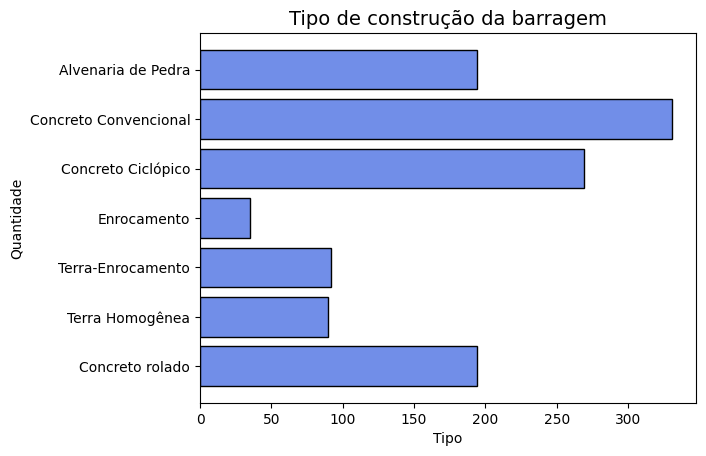

In [13]:
plt.title('Tipo de construção da barragem',fontsize=14)
sns.histplot(y='DscTipoConstrucaoBarragem',data=barragem_rs,color='royalblue',
             shrink=.8)
plt.xlabel('Tipo')
plt.ylabel('Quantidade');

<Axes: xlabel='Count', ylabel='DscEstimativaVazaoProjeto'>

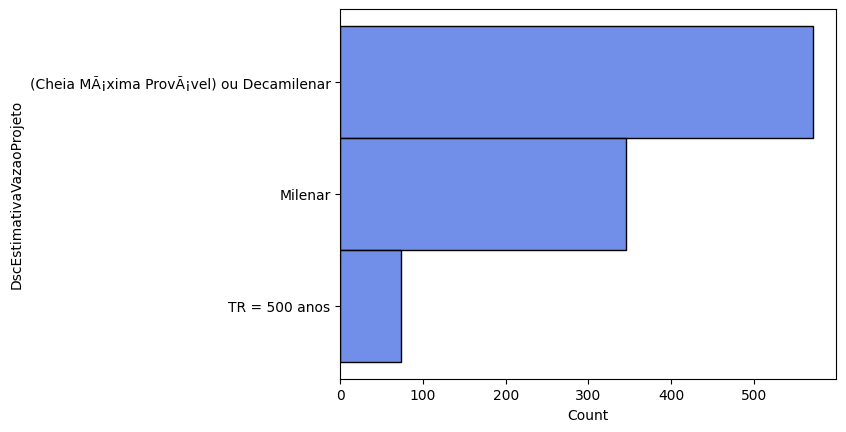

In [14]:
sns.histplot(y='DscEstimativaVazaoProjeto',data=barragem_rs,color='royalblue')

<Axes: xlabel='Count', ylabel='DscCasaForca'>

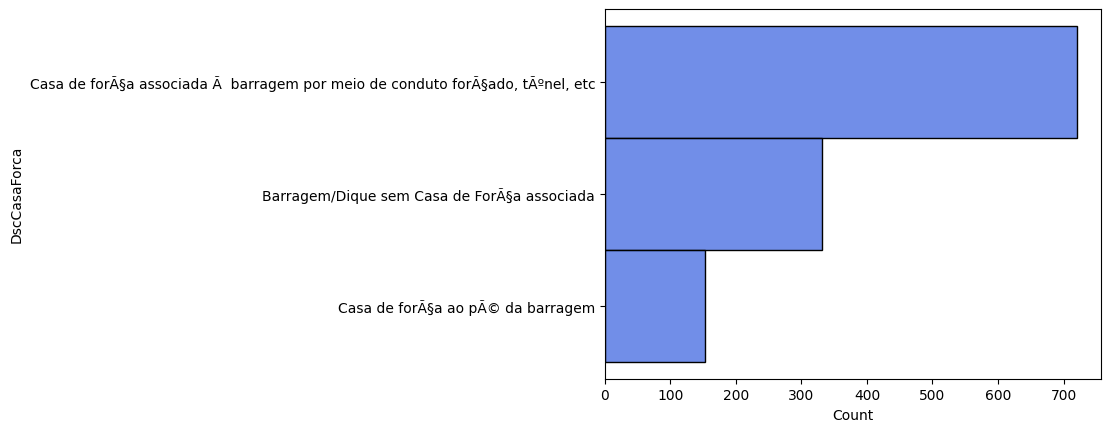

In [15]:
sns.histplot(y='DscCasaForca',data=barragem_rs,color='royalblue')

<Axes: xlabel='Count', ylabel='DscComprimento'>

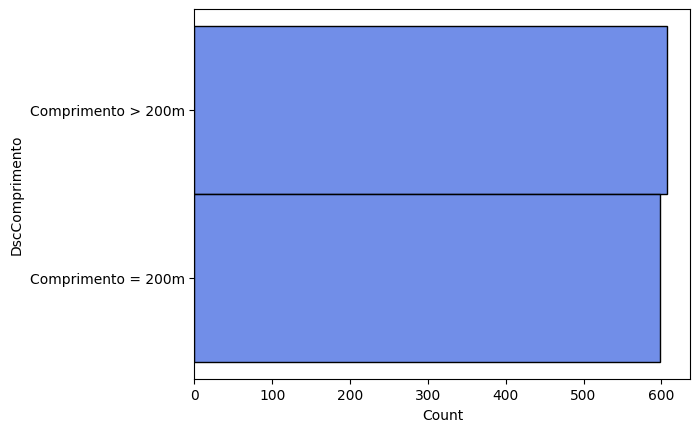

In [16]:

sns.histplot(y='DscComprimento',data=barragem_rs,color='royalblue')

<Axes: xlabel='Count', ylabel='DscIdadeBarragem'>

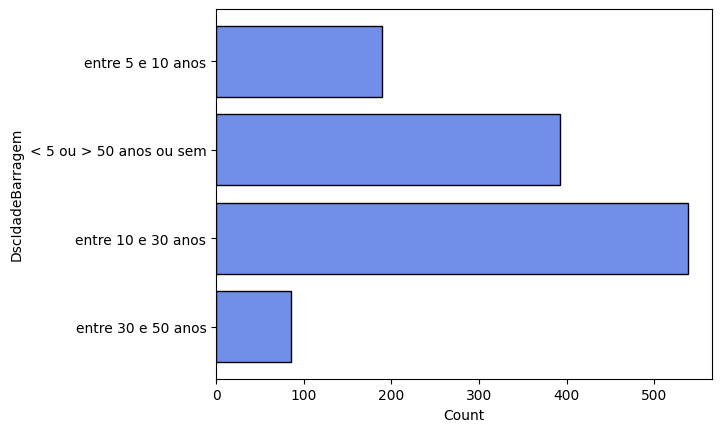

In [17]:

sns.histplot(y='DscIdadeBarragem',data=barragem_rs,color='royalblue',
             shrink=.8)

<Axes: xlabel='Count', ylabel='DscTipoEstrutural'>

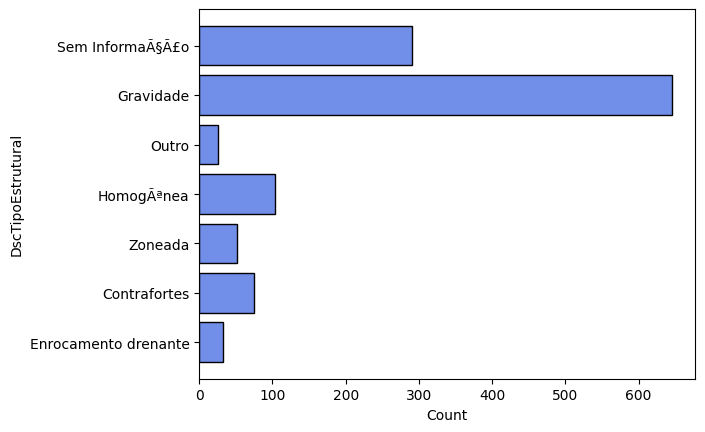

In [18]:
sns.histplot(y='DscTipoEstrutural',data=barragem_rs,color='royalblue',
             shrink=.8)

In [20]:
barragem_rs.iloc[:,0:20].head()

,IdeNucleoCEG,NomUsina,NomEmpresa,NomBarramento,DscTipo,DscNivelSegurancaBarragem,IdcClassificacaoBarragens,DscCategoriaRiscoGeral,DscDanoPotencialGeral,DscVersao,NomCampanha,DatInicioCampanha,DatFimCampanha,DatInicioPrazoLegalCampanha,DatFimPrazoLegalCampanha,NomSecundario,DatConclusaoConstrucao,MdaAlturaMacicoTerreno,MdaAlturaMacicoFundacao,MdaComprimento
0,12.0,14 de Julho,Companhia energÃ©tica rio das antas,14 de Julho,Barragem,Normal,B,Baixo,Alto,VersÃ£o 1,Campanha 2016/1,2016-11-01,2017-01-31,2016-11-01,2017-01-31,NaN,2008-10-15,NaN,42.0,395.0
1,324.0,Bugres,Companhia estadual de geraÃ§Ã£o de energia elÃ...,Divisa,Barragem,Normal,C,Baixo,Baixo,VersÃ£o 1,Campanha 2016/1,2016-11-01,2017-01-31,2016-11-01,2017-01-31,NaN,1960-08-01,NaN,27.5,239.0
2,324.0,Bugres,Companhia estadual de geraÃ§Ã£o de energia elÃ...,Blang,Barragem,Normal,B,Baixo,Alto,VersÃ£o 1,Campanha 2016/1,2016-11-01,2017-01-31,2016-11-01,2017-01-31,NaN,1956-02-01,NaN,19.3,507.0
3,324.0,Bugres,Companhia estadual de geraÃ§Ã£o de energia elÃ...,Salto,Barragem,Normal,B,Baixo,Alto,VersÃ£o 1,Campanha 2016/1,2016-11-01,2017-01-31,2016-11-01,2017-01-31,NaN,1951-01-01,NaN,10.0,600.0
4,329.0,BuricÃ¡,Cooperativa de desenvolvimento social entre ri...,PCH BURICÃ,Barragem,Normal,C,Baixo,Baixo,VersÃ£o 1,Campanha 2016/1,2016-11-01,2017-01-31,2016-11-01,2017-01-31,NaN,1999-05-08,NaN,11.5,120.0


<Axes: xlabel='MdaComprimento', ylabel='Count'>

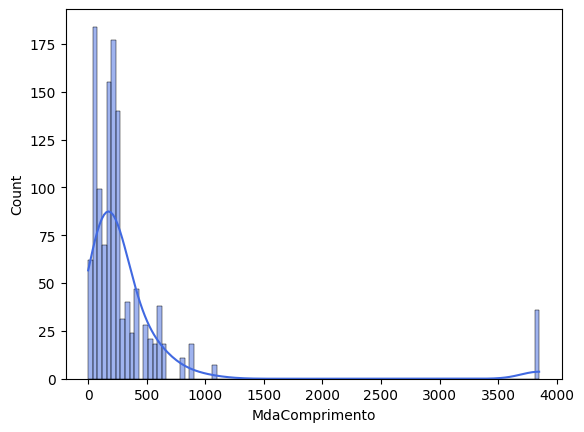

In [22]:
sns.histplot(x='MdaComprimento',data=barragem_rs,color='royalblue',
             kde=True)

<Axes: xlabel='MdaAlturaMacicoFundacao', ylabel='Count'>

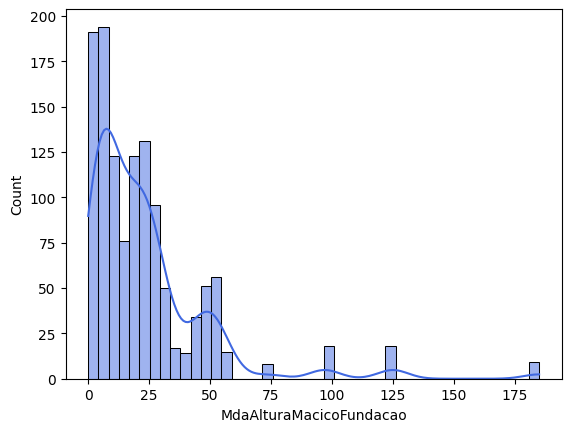

In [23]:
sns.histplot(x='MdaAlturaMacicoFundacao',data=barragem_rs,color='royalblue',
             kde=True)

In [29]:
barragem_rs['MdaAlturaMacicoTerreno'] = barragem_rs['MdaAlturaMacicoTerreno'].str.replace(',','.')
barragem_rs['MdaAlturaMacicoTerreno'] = barragem_rs['MdaAlturaMacicoTerreno'].astype(float)

<Axes: xlabel='MdaAlturaMacicoTerreno', ylabel='Count'>

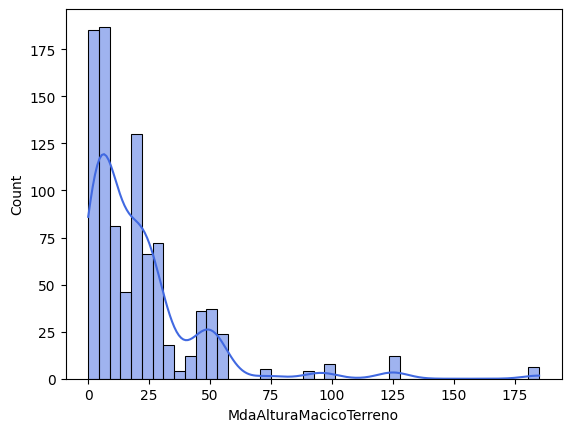

In [32]:
sns.histplot(x='MdaAlturaMacicoTerreno',data=barragem_rs,color='royalblue',
             kde=True)

In [38]:
# Colunas a ser selecionadas

barragem_rs_sel = barragem_rs[['IdeNucleoCEG','NomUsina','NomEmpresa','NomBarramento','DscTipo','DscNivelSegurancaBarragem',
                               'DscTipoFundacao','DscTipoConstrucaoBarragem','DscCategoriaRiscoGeral','DscDanoPotencialGeral',
                                'DscTipoFundacao','DscTipoConstrucaoBarragem', 'DscEstimativaVazaoProjeto','DscCasaForca',
                               'DscIdadeBarragem','DscTipoEstrutural','MdaComprimento','MdaAlturaMacicoFundacao','MdaAlturaMacicoTerreno']]
barragem_rs_sel.head()

,IdeNucleoCEG,NomUsina,NomEmpresa,NomBarramento,DscTipo,DscNivelSegurancaBarragem,DscTipoFundacao,DscTipoConstrucaoBarragem,DscCategoriaRiscoGeral,DscDanoPotencialGeral,DscTipoFundacao,DscTipoConstrucaoBarragem,DscEstimativaVazaoProjeto,DscCasaForca,DscIdadeBarragem,DscTipoEstrutural,MdaComprimento,MdaAlturaMacicoFundacao,MdaAlturaMacicoTerreno
0,12.0,14 de Julho,Companhia energÃ©tica rio das antas,14 de Julho,Barragem,Normal,Rocha SÃ£,Alvenaria de Pedra,Baixo,Alto,Rocha SÃ£,Alvenaria de Pedra,(Cheia MÃ¡xima ProvÃ¡vel) ou Decamilenar,Casa de forÃ§a associada Ã barragem por meio ...,entre 5 e 10 anos,Sem InformaÃ§Ã£o,395.0,42.0,NaN
1,324.0,Bugres,Companhia estadual de geraÃ§Ã£o de energia elÃ...,Divisa,Barragem,Normal,Rocha alterada dura com tratamento,Alvenaria de Pedra,Baixo,Baixo,Rocha alterada dura com tratamento,Alvenaria de Pedra,(Cheia MÃ¡xima ProvÃ¡vel) ou Decamilenar,Barragem/Dique sem Casa de ForÃ§a associada,< 5 ou > 50 anos ou sem,Sem InformaÃ§Ã£o,239.0,27.5,NaN
2,324.0,Bugres,Companhia estadual de geraÃ§Ã£o de energia elÃ...,Blang,Barragem,Normal,Rocha alterada sem tratramento / Rocha alterad...,Alvenaria de Pedra,Baixo,Alto,Rocha alterada sem tratramento / Rocha alterad...,Alvenaria de Pedra,(Cheia MÃ¡xima ProvÃ¡vel) ou Decamilenar,Barragem/Dique sem Casa de ForÃ§a associada,< 5 ou > 50 anos ou sem,Sem InformaÃ§Ã£o,507.0,19.3,NaN
3,324.0,Bugres,Companhia estadual de geraÃ§Ã£o de energia elÃ...,Salto,Barragem,Normal,Rocha alterada sem tratramento / Rocha alterad...,Alvenaria de Pedra,Baixo,Alto,Rocha alterada sem tratramento / Rocha alterad...,Alvenaria de Pedra,(Cheia MÃ¡xima ProvÃ¡vel) ou Decamilenar,Casa de forÃ§a associada Ã barragem por meio ...,< 5 ou > 50 anos ou sem,Sem InformaÃ§Ã£o,600.0,10.0,NaN
4,329.0,BuricÃ¡,Cooperativa de desenvolvimento social entre ri...,PCH BURICÃ,Barragem,Normal,Rocha SÃ£,Alvenaria de Pedra,Baixo,Baixo,Rocha SÃ£,Alvenaria de Pedra,(Cheia MÃ¡xima ProvÃ¡vel) ou Decamilenar,Barragem/Dique sem Casa de ForÃ§a associada,entre 10 e 30 anos,Sem InformaÃ§Ã£o,120.0,11.5,NaN


In [39]:
barragem_rs_sel['IdeNucleoCEG'] = barragem_rs_sel['IdeNucleoCEG'].astype(int)
barragem_rs_sel.head()

<ipython-input-39-c8f3c3834828>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  barragem_rs_sel['IdeNucleoCEG'] = barragem_rs_sel['IdeNucleoCEG'].astype(int)


,IdeNucleoCEG,NomUsina,NomEmpresa,NomBarramento,DscTipo,DscNivelSegurancaBarragem,DscTipoFundacao,DscTipoConstrucaoBarragem,DscCategoriaRiscoGeral,DscDanoPotencialGeral,DscTipoFundacao,DscTipoConstrucaoBarragem,DscEstimativaVazaoProjeto,DscCasaForca,DscIdadeBarragem,DscTipoEstrutural,MdaComprimento,MdaAlturaMacicoFundacao,MdaAlturaMacicoTerreno
0,12,14 de Julho,Companhia energÃ©tica rio das antas,14 de Julho,Barragem,Normal,Rocha SÃ£,Alvenaria de Pedra,Baixo,Alto,Rocha SÃ£,Alvenaria de Pedra,(Cheia MÃ¡xima ProvÃ¡vel) ou Decamilenar,Casa de forÃ§a associada Ã barragem por meio ...,entre 5 e 10 anos,Sem InformaÃ§Ã£o,395.0,42.0,NaN
1,324,Bugres,Companhia estadual de geraÃ§Ã£o de energia elÃ...,Divisa,Barragem,Normal,Rocha alterada dura com tratamento,Alvenaria de Pedra,Baixo,Baixo,Rocha alterada dura com tratamento,Alvenaria de Pedra,(Cheia MÃ¡xima ProvÃ¡vel) ou Decamilenar,Barragem/Dique sem Casa de ForÃ§a associada,< 5 ou > 50 anos ou sem,Sem InformaÃ§Ã£o,239.0,27.5,NaN
2,324,Bugres,Companhia estadual de geraÃ§Ã£o de energia elÃ...,Blang,Barragem,Normal,Rocha alterada sem tratramento / Rocha alterad...,Alvenaria de Pedra,Baixo,Alto,Rocha alterada sem tratramento / Rocha alterad...,Alvenaria de Pedra,(Cheia MÃ¡xima ProvÃ¡vel) ou Decamilenar,Barragem/Dique sem Casa de ForÃ§a associada,< 5 ou > 50 anos ou sem,Sem InformaÃ§Ã£o,507.0,19.3,NaN
3,324,Bugres,Companhia estadual de geraÃ§Ã£o de energia elÃ...,Salto,Barragem,Normal,Rocha alterada sem tratramento / Rocha alterad...,Alvenaria de Pedra,Baixo,Alto,Rocha alterada sem tratramento / Rocha alterad...,Alvenaria de Pedra,(Cheia MÃ¡xima ProvÃ¡vel) ou Decamilenar,Casa de forÃ§a associada Ã barragem por meio ...,< 5 ou > 50 anos ou sem,Sem InformaÃ§Ã£o,600.0,10.0,NaN
4,329,BuricÃ¡,Cooperativa de desenvolvimento social entre ri...,PCH BURICÃ,Barragem,Normal,Rocha SÃ£,Alvenaria de Pedra,Baixo,Baixo,Rocha SÃ£,Alvenaria de Pedra,(Cheia MÃ¡xima ProvÃ¡vel) ou Decamilenar,Barragem/Dique sem Casa de ForÃ§a associada,entre 10 e 30 anos,Sem InformaÃ§Ã£o,120.0,11.5,NaN


In [40]:
barragem_rs_sel['IdcClassificacaoBarragens'] = barragem_rs['IdcClassificacaoBarragens']
barragem_rs_sel.head()

<ipython-input-40-17c8675f8412>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  barragem_rs_sel['IdcClassificacaoBarragens'] = barragem_rs['IdcClassificacaoBarragens']


,IdeNucleoCEG,NomUsina,NomEmpresa,NomBarramento,DscTipo,DscNivelSegurancaBarragem,DscTipoFundacao,DscTipoConstrucaoBarragem,DscCategoriaRiscoGeral,DscDanoPotencialGeral,DscTipoFundacao,DscTipoConstrucaoBarragem,DscEstimativaVazaoProjeto,DscCasaForca,DscIdadeBarragem,DscTipoEstrutural,MdaComprimento,MdaAlturaMacicoFundacao,MdaAlturaMacicoTerreno,IdcClassificacaoBarragens
0,12,14 de Julho,Companhia energÃ©tica rio das antas,14 de Julho,Barragem,Normal,Rocha SÃ£,Alvenaria de Pedra,Baixo,Alto,Rocha SÃ£,Alvenaria de Pedra,(Cheia MÃ¡xima ProvÃ¡vel) ou Decamilenar,Casa de forÃ§a associada Ã barragem por meio ...,entre 5 e 10 anos,Sem InformaÃ§Ã£o,395.0,42.0,NaN,B
1,324,Bugres,Companhia estadual de geraÃ§Ã£o de energia elÃ...,Divisa,Barragem,Normal,Rocha alterada dura com tratamento,Alvenaria de Pedra,Baixo,Baixo,Rocha alterada dura com tratamento,Alvenaria de Pedra,(Cheia MÃ¡xima ProvÃ¡vel) ou Decamilenar,Barragem/Dique sem Casa de ForÃ§a associada,< 5 ou > 50 anos ou sem,Sem InformaÃ§Ã£o,239.0,27.5,NaN,C
2,324,Bugres,Companhia estadual de geraÃ§Ã£o de energia elÃ...,Blang,Barragem,Normal,Rocha alterada sem tratramento / Rocha alterad...,Alvenaria de Pedra,Baixo,Alto,Rocha alterada sem tratramento / Rocha alterad...,Alvenaria de Pedra,(Cheia MÃ¡xima ProvÃ¡vel) ou Decamilenar,Barragem/Dique sem Casa de ForÃ§a associada,< 5 ou > 50 anos ou sem,Sem InformaÃ§Ã£o,507.0,19.3,NaN,B
3,324,Bugres,Companhia estadual de geraÃ§Ã£o de energia elÃ...,Salto,Barragem,Normal,Rocha alterada sem tratramento / Rocha alterad...,Alvenaria de Pedra,Baixo,Alto,Rocha alterada sem tratramento / Rocha alterad...,Alvenaria de Pedra,(Cheia MÃ¡xima ProvÃ¡vel) ou Decamilenar,Casa de forÃ§a associada Ã barragem por meio ...,< 5 ou > 50 anos ou sem,Sem InformaÃ§Ã£o,600.0,10.0,NaN,B
4,329,BuricÃ¡,Cooperativa de desenvolvimento social entre ri...,PCH BURICÃ,Barragem,Normal,Rocha SÃ£,Alvenaria de Pedra,Baixo,Baixo,Rocha SÃ£,Alvenaria de Pedra,(Cheia MÃ¡xima ProvÃ¡vel) ou Decamilenar,Barragem/Dique sem Casa de ForÃ§a associada,entre 10 e 30 anos,Sem InformaÃ§Ã£o,120.0,11.5,NaN,C


In [41]:
barragem_rs_sel.to_csv('Barragem rs colunas selecionada.csv')